---
# Name of Method - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,...,Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,1
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,...,0,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,...,0,1,1,1,0,1,0,1,0,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,1
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [4]:
# Separating the dataset into a training dataset (70%) and testing+validation (30%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.7, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (15%) and a validation dataset (15%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [5]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## K Nearest Neighbour Model

</center>

---

### Find best parameters for model


In [7]:
# Initialize classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
## Evaluate Model

In [9]:
y_pred = knn.predict(X_test_scaled)

print(y_pred)

[0 1 0 ... 0 0 0]


In [10]:
knn.predict_proba(X_test_scaled)

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Accuracy

In [11]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7370


In [12]:
# Compare train and test scores

print('Training set score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test_scaled, y_test)))

Training set score: 0.8576
Test set score: 0.7370


In [13]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[638 145]
 [133 141]]

True Positives(TP) =  638

True Negatives(TN) =  141

False Positives(FP) =  145

False Negatives(FN) =  133


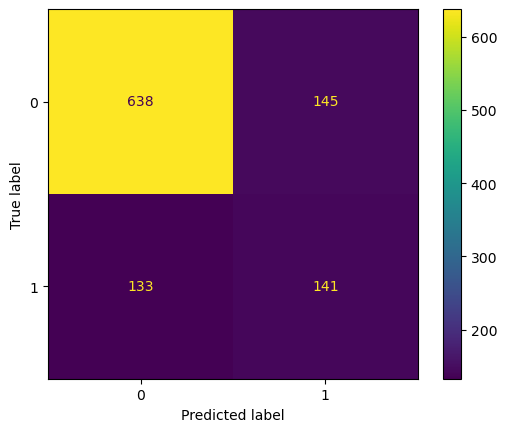

In [14]:
# Display the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [15]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       783
           1       0.49      0.51      0.50       274

    accuracy                           0.74      1057
   macro avg       0.66      0.66      0.66      1057
weighted avg       0.74      0.74      0.74      1057



##  k-fold Cross-Validation

Let's apply K-Fold Cross-Validation to our model.

In [16]:
# Applying 10-Fold cross-validation

scores = cross_val_score(knn, X_train_scaled, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.72210953 0.7464503  0.76267748 0.75862069 0.72413793 0.7464503
 0.75456389 0.7464503  0.73022312 0.72413793]


We can summarize the cross-validation accuracy by calculating its mean.

In [17]:
# Compute average cross-validation score

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))
print('\nLowest cross-validation score: {:.4f}'.format(scores.min()))
print('\nHighest cross-validation score: {:.4f}'.format(scores.max()))


Average cross-validation score: 0.7416

Lowest cross-validation score: 0.7221

Highest cross-validation score: 0.7627


The model's average performance across different subsets of the data is 75.33%. This means that, on average, the model correctly classifies 75.33% of the data in each fold.
The highest score is 77.30%. This represents the best performance on any single fold. During this fold, the model performed with 77.30% accuracy.

Text(0.5, 0, 'K Value')

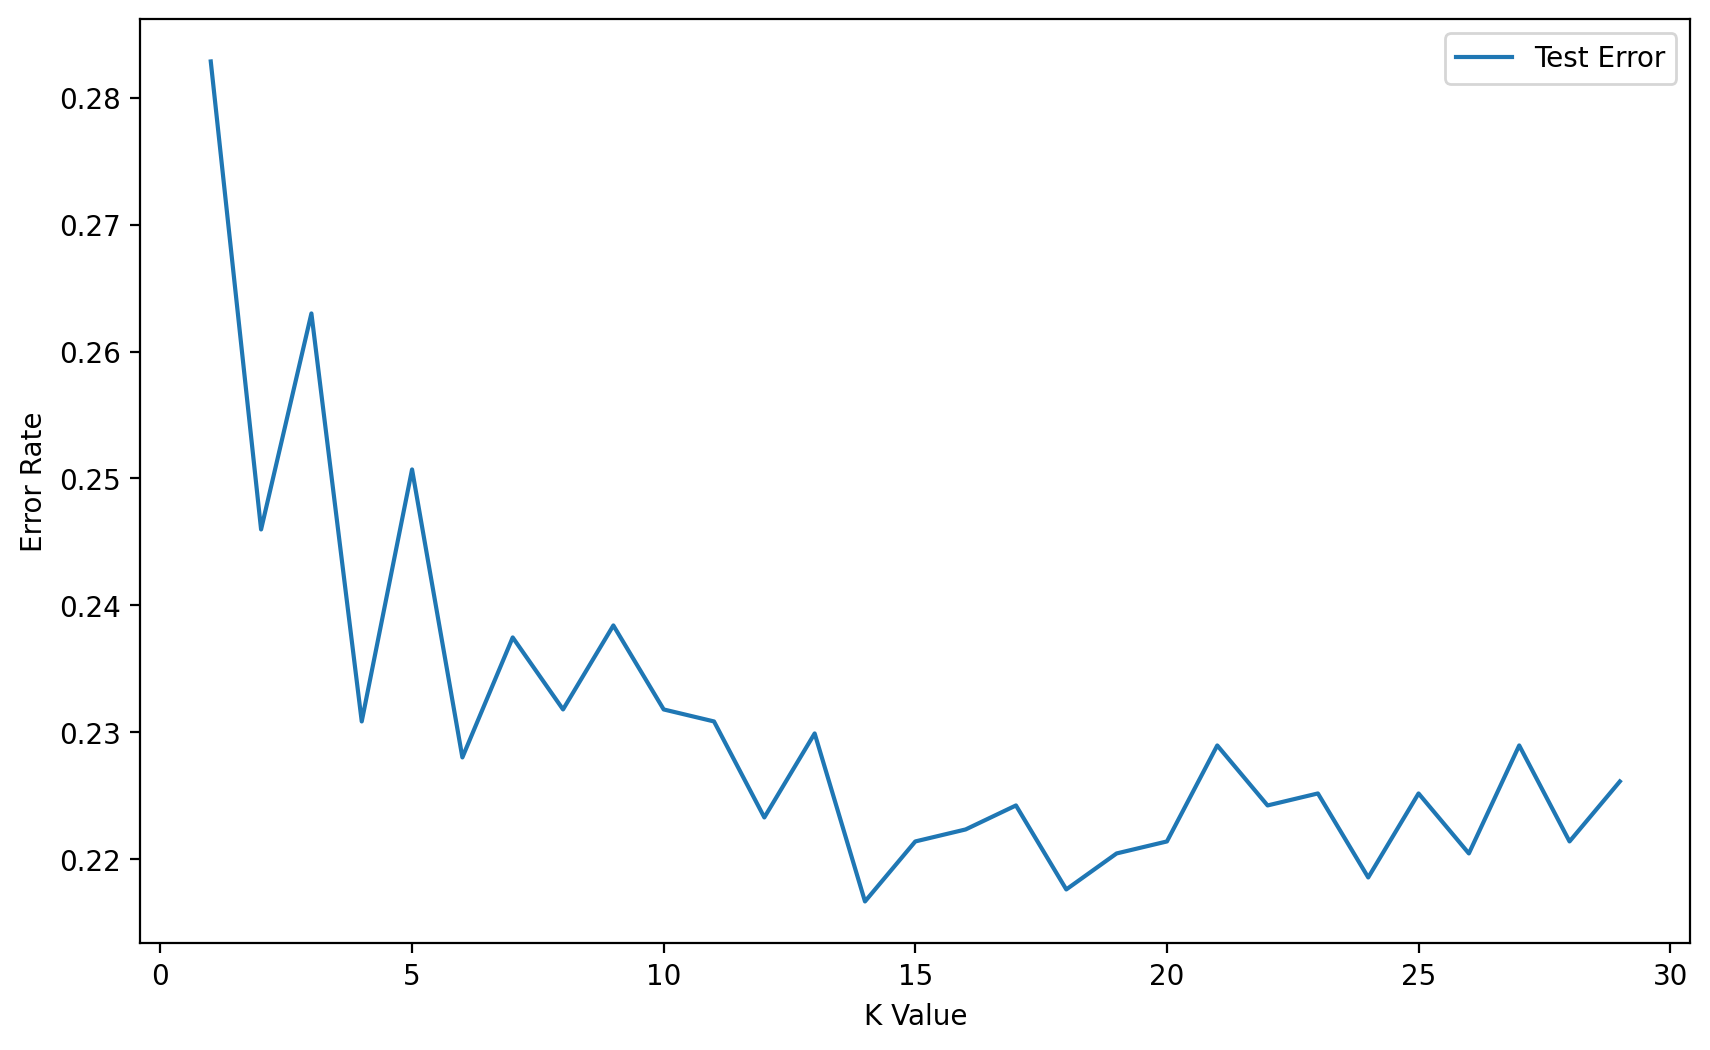

In [18]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Run model on training dataset

In [19]:
# Set-up pipeline object

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [20]:
# Set-up parameter grid using
# Use GridSearchCV to find optimal params
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': list(range(1,20)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='f1')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [21]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors=17, p=1.75))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=17, p=1.75),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 17,
 'classifier__p': 1.75,
 'classifier__weights': 'uniform'}

### Evaluate GridSearchCV Model

In [22]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__n_neighbors', 'param_classifier__p', 'param_classifier__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

[0.47781969 0.47781969 0.47938281 0.47938281 0.4794252  0.4794252
 0.48239356 0.48239356 0.48874395 0.48874395 0.39397298 0.47781969
 0.3911416  0.47938281 0.39412303 0.4794252  0.39417518 0.48239356
 0.38904265 0.48874395 0.52241032 0.51484503 0.52085351 0.51513522
 0.51993701 0.51448929 0.52170783 0.51532853 0.51712994 0.51231542
 0.46809724 0.51344254 0.47133456 0.51299376 0.46548483 0.5087463
 0.46259207 0.50986604 0.46275781 0.50948779 0.53586071 0.52714497
 0.53536045 0.52703009 0.54106563 0.53240226 0.54060954 0.5291054
 0.54210014 0.53222014 0.48912415 0.53156291 0.48875509 0.52921459
 0.49074592 0.52620046 0.4919357  0.53042563 0.49598797 0.53572748
 0.54374579 0.53941364 0.54282535 0.54431164 0.54834471 0.54525091
 0.54923926 0.54547545 0.54551818 0.54348073 0.51003632 0.54021588
 0.50881388 0.53943891 0.50971174 0.54134512 0.51896841 0.54910777
 0.51840415 0.54772063 0.56231842 0.55107408 0.55890671 0.55252097
 0.55833842 0.54781406 0.5589766  0.5471414  0.55475448 0.5411643

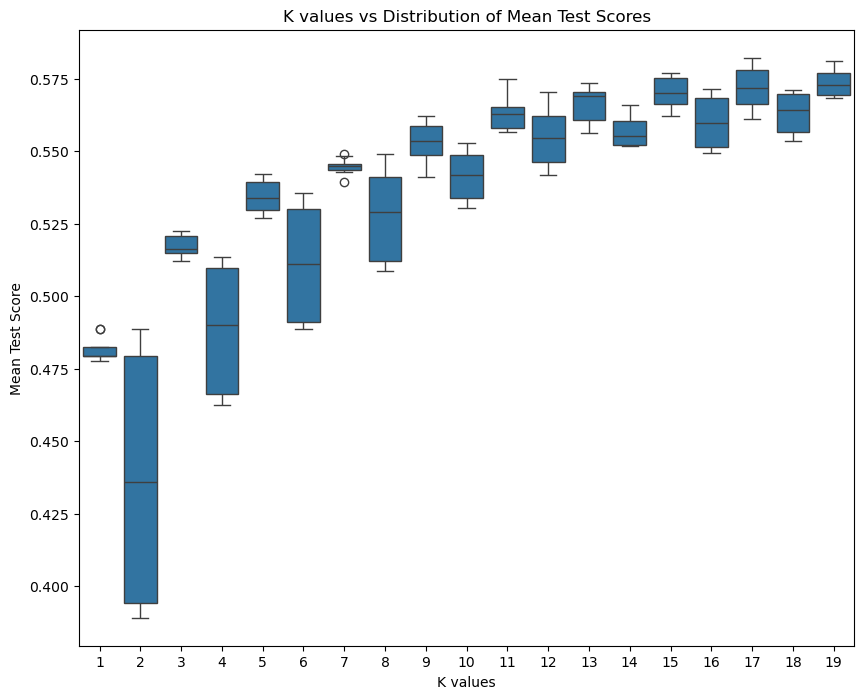

In [23]:
# Mean test scores

# Retrieve k values
k_values = full_cv_classifier.cv_results_['param_classifier__n_neighbors'].data

# Retrieve mean test scores
mean_test_score = full_cv_classifier.cv_results_['mean_test_score']

print(mean_test_score)

# Create figure and adjust its size
plt.figure(figsize=(10,8))

# Create box plot
ax = sns.boxplot(x=k_values, y = mean_test_score)

# Add tittle
ax.set_title('K values vs Distribution of Mean Test Scores')

# Set axis labels
ax.set_xlabel(xlabel='K values')
ax.set_ylabel(ylabel='Mean Test Score')

# Show plot
plt.show()

In [24]:
full_cv_classifier.cv_results_['mean_test_score'].mean()

0.5377852825246868

In [25]:
pipe.set_params(classifier__n_neighbors=19)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

In [26]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

In [27]:
pipe_pred = pipe.predict(X_test)

In [28]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       783
           1       0.57      0.58      0.58       274

    accuracy                           0.78      1057
   macro avg       0.71      0.72      0.71      1057
weighted avg       0.78      0.78      0.78      1057



In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       783
           1       0.49      0.51      0.50       274

    accuracy                           0.74      1057
   macro avg       0.66      0.66      0.66      1057
weighted avg       0.74      0.74      0.74      1057



## Classification report on pipeline data:


| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| 0             | 0.84      | 0.88   | 0.86     | 520     |
| 1             | 0.61      | 0.53   | 0.57     | 185     |
| **Accuracy**  |           |        | **0.79** | 705     |
| **Macro avg** | 0.72      | 0.70   | 0.71     | 705     |
| **Weighted avg** | 0.78   | 0.79   | 0.78     | 705     |

---

### Explanation of Metrics:
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
- **Support**: The number of actual occurrenc




### Classification report on test data:

| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| 0             | 0.84      | 0.83   | 0.84     | 520     |
| 1             | 0.54      | 0.56   | 0.55     | 185     |
| **Accuracy**  |           |        | **0.76** | 705     |
| **Macro avg** | 0.69      | 0.70   | 0.70     | 705     |
| **Weighted avg** | 0.76   | 0.76   | 0.76     | 705     |

---

### Explanation of Metrics:
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
- **Support**: The number of actual occurrences of the class in the dataset.


### Investigate best model's predictive features

---

<center>
    
## Validation

</center>

---

### Run model on testing dataset

### Model's validation

---

<center>
    
## Results

</center>

---

### Results